<a href="https://colab.research.google.com/github/gabrielcapela/Credit-Card-Fraud-Detection-/blob/main/Credit_Card_Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


<img width=25% src="https://raw.githubusercontent.com/gabrielcapela/Credit-Card-Fraud-Detection-/main/images/myself.png" align=right>

#**Credit Card Fraud Detection Project**

*by Gabriel Capela*

---
Credit card fraud is one of the biggest challenges to financial security in the digital world. According to payments industry research firm [Nilson Report](https://https://nilsonreport.com/), global card losses attributed to fraud reached $33 billion in 2022, affecting consumers, banks and merchants.

To mitigate this problem, financial institutions are investing significant amounts in prevention technologies, including systems based on artificial intelligence and machine learning (ML).

<p align="center">
<img width=60% src="https://raw.githubusercontent.com/gabrielcapela/Credit-Card-Fraud-Detection-/main/images/credit_card.jpg">
</p>

Despite this effort, the challenge of detecting fraud remains complex. Machine learning techniques need to identify fraudulent transactions with high accuracy, differentiating between false positives (legitimate transactions mistakenly flagged as fraud) and true positives (fraudulent transactions correctly detected). While false positives can result in negative customer experiences, such as having their card blocked while traveling, and damage to the reputation of companies, false negatives, on the other hand, allow fraud to occur.

This critical balance makes the problem particularly challenging and interesting for the application of machine learning techniques.

The data used was extracted from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) and contains thousands of credit card transactions made in September 2013 by European cardholders.

#**Introduction**

For this type of problem, **classification algorithms** are ideal, as they are designed to separate data into classes. In this context, we will have two classes, non-fraudulent (Class=0) and fraudulent (Class=1).

The problem of detecting credit card fraud is challenging due to class imbalance, since fraudulent transactions represent a minimal fraction of the data, requiring techniques to deal with **imbalanced data**.

**Different types of models** will be built, with **different data balancing techniques**, in order to verify the best possible model and be able to extract positive aspects from each one.

This project is divided into 5 sections: this section presents an introduction to what will be done; in the **Exploratory Data Analysis** section, the dataset will be analyzed, describing its dimensions, description of the variables and their statistical summaries, in addition to checking for missing values, outliers, distribution and correlation between the variables; in the **Data Preparation** section, the data will be normalized, followed by its division between training, validation and test sets, and finally, the training set will be balanced; in the **Modeling** section, the machine learning models will be created and validated with the validation data; and finally, in the **Final Results** section, the final model will be tested and a brief conclusion will be presented.

#**Exploratory Data Analysis**

##Obtaining and Verifying the Dataset

The dataset was retrieved from the [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) platform and can be downloaded from the following [link](https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1). The original data was not made available for confidentiality reasons, this file contains only numerical input variables that are the result of a **PCA** transformation.

**PCA** (Principal Component Analysis) is a dimensionality reduction technique that transforms correlated variables into a smaller set of independent variables called principal components. It maintains most of the variance of the original data, simplifying the analysis by reducing complexity.
   



In [71]:
# We start by importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Importing the file and viewing its first lines
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")
df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [73]:
# Viewing your size
print(f"The dataset has {df.shape[0]} entries and {df.shape[0]-1} variables that will be used to predict the 'Class' column")
df.shape

The dataset has 284807 entries and 284806 variables that will be used to predict the 'Class' column


(284807, 31)

The variables **V1, V2, … V28** are the principal components obtained with PCA, the only variables that were not transformed with PCA are **Time**, **Amount** and **Class**.

The variable **Time** contains the time (in seconds) elapsed between each transaction and the first transaction in the dataset; the variable **Amount** is the transaction value; and the variable **Class** is our target, assuming the value 1 in case of fraud and 0 otherwise.
  

In [74]:
# Confirming the data type and obtaining a descriptive summary:
print(df.dtypes)
print(df.describe())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.2037

It is confirmed that all data is numerical. It is worth noting that the average transaction value (**Amount)** is 88; and the average in the **Class** column is very low, highlighting the imbalance in the data.

##Verification and Treatment of missing values

In [75]:
 # Checking total missing values ​​per column
 print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There are no missing values ​​in the dataset.



##Identification and Treatment of Outliers

The existence of **Outliers** will be checked using the **Z-Score** method.

The **Z-score** measures the number of standard deviations that a value is away from the mean of a data set. It is obtained using the formula **Z=(X-μ)/σ**, where X is the data analyzed, μ is the mean of that column and σ is the standard deviation of that column. When the threshold |Z|>3, the value is generally considered an outlier.

The code below will search for a threshold that **does not eliminate more than 5% of the total data set**. It will also check whether the amount of data to be eliminated has proportionally more fraudulent entries than non-fraudulent ones, in relation to the original dataset.







In [76]:
# Only variables from PCA will be analyzed
exclude_columns = ['Time', 'Amount', 'Class']
def remove_outliers_zscore(df, exclude_columns, threshold):
    df_sem_out = df.copy()

    # Identifying numeric columns that are not in exclude_columns
    columns_to_check = [col for col in df_sem_out.select_dtypes(include=['number']).columns if col not in exclude_columns]

    # Checking each column in turn
    for coluna in columns_to_check:
        media = df[coluna].mean()
        desvio_padrao = df[coluna].std()

        # Calculating the Z-Score for the column
        z_scores = (df[coluna] - media) / desvio_padrao

        # Filter DataFrame by removing rows with Z-Score above threshold
        df_sem_out = df[z_scores.abs() <= threshold]

    return df_sem_out

# Starting with a threshold equal to 3
threshold = 3
df_sem_out = remove_outliers_zscore(df, exclude_columns, threshold )
# Increase the threshold if it eliminates more than 5% of the data
while (df_sem_out.shape[0]/df.shape[0]) < 0.95:
  threshold += 0.1
  df_sem_out = remove_outliers_zscore(df, exclude_columns, threshold )

# Displaying the result
print("Original DataFrame:", df.shape)
print("Threshold:", threshold)
print("DataFrame without outliers:", df_sem_out.shape)
print(f"Percentage of data deleted: {(1-(df_sem_out.shape[0]/df.shape[0]))*100:.3f}%")
print(f"Percentage of genuine data deleted: {(1-(df_sem_out[df_sem_out['Class'] == 0].shape[0])/(df[df['Class'] == 0].shape[0]))*100:.3f}%")
print(f"Percentage of fraudulent data eliminated: {(1-(df_sem_out[df_sem_out['Class'] == 1].shape[0]/df[df['Class'] == 1].shape[0]))*100:.3f}%")

Original DataFrame: (284807, 31)
Threshold: 3
DataFrame without outliers: (281543, 31)
Percentage of data deleted: 1.146%
Percentage of genuine data deleted: 1.133%
Percentage of fraudulent data eliminated: 8.943%


A threshold of 3 eliminated only 1.1% of the data. In principle, this data would be eliminated. However, this 1.1% contains 8.9% of the fraud data.

The outliers contain a considerable portion of the fraud data, so they will not be eliminated, as they could play an important role in the prediction.

##Verification of the type of Distribution of variables

First, it is important to highlight the imbalance of the data, the data with fraud represents only 0.17% of the dataset:

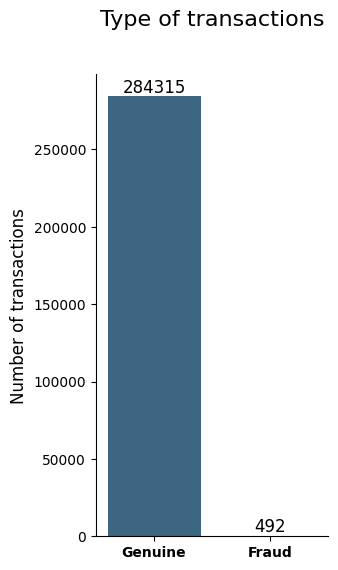

Fraudulent transactions represent only 0.173% of the total data.


In [77]:
# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# Mapping classes to chart labels
class_labels = {0: 'Genuine', 1: 'Fraud'}

# Create the chart
plt.figure(figsize=(3, 6))
ax = sns.countplot(data=df, x='Class', palette='viridis')

# Changing the labels on the x-axis
ax.set_xticklabels([class_labels[i] for i in sorted(df['Class'].unique())],
    fontweight='bold')

# Adding the count above the bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black'
    )

# Customizing the chart
plt.title('Type of transactions', fontsize=16, pad=35)
ax.set_xlabel('')
plt.ylabel('Number of transactions', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Displaying the chart
plt.show()

print(f"Fraudulent transactions represent only {(df[df['Class'] == 1].shape[0]/df.shape[0])*100:.3f}% of the total data.")


In unbalanced sets like this, the **majority class** will dominate the learning, causing the model to tend to **ignore the minority class**. This would result in high apparent overall accuracy, but low ability to detect the least represented class, which is usually the one of greatest interest, such as fraud or disease.

With this, the data will be balanced (same amount for each **Class**) in the **Data Preparation** section.

---

Another interesting analysis is the mean and median of the transaction value for transactions that were fraudulent.

Fraudulent transactions have a higher mean, but this is caused by outliers, since their median is much lower than that of genuine transactions:

In [78]:
print(f'The average value of transactions is {df["Amount"].mean():.2f} and the average value of transactions \nthat were fraudulent is {df[df["Class"] == 1]["Amount"].mean():.2f}.')



The average value of transactions is 88.35 and the average value of transactions 
that were fraudulent is 122.21.


In [79]:
# Also checking the median
print(f'The median value of transactions is {df["Amount"].median():.2f} and the median value of transactions \nthat were fraudulent is {df[df["Class"] == 1]["Amount"].median():.2f}.')

The median value of transactions is 22.00 and the median value of transactions 
that were fraudulent is 9.25.


##Verification of the Correlation between variables

Checking the distribution of transactions over time:


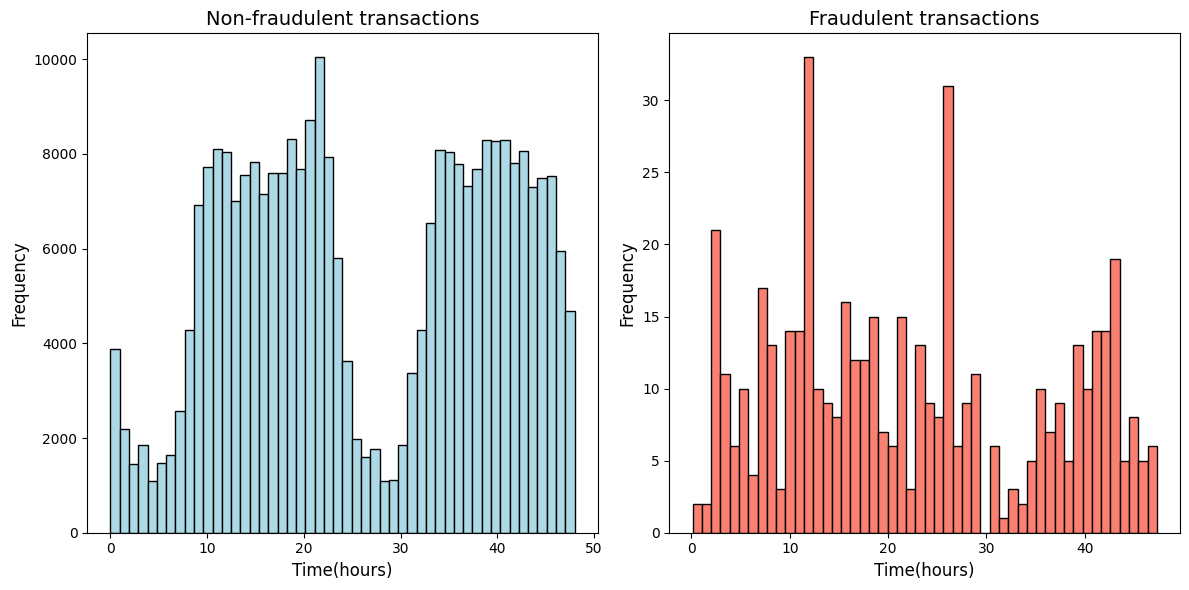

In [80]:
# Separating the data into two categories (Class 0 and Class 1) and converting to hours:
df_class_0 = df[df['Class'] == 0]['Time'] / 3600
df_class_1 = df[df['Class'] == 1]['Time'] / 3600

# Creating side-by-side graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Class 0
axes[0].hist(df_class_0, bins=50, color='lightblue', edgecolor='black')
axes[0].set_title('Non-fraudulent transactions', fontsize=14)
axes[0].set_xlabel('Time(hours)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Histogram for Class 1
axes[1].hist(df_class_1, bins=50, color='salmon', edgecolor='black')
axes[1].set_title('Fraudulent transactions', fontsize=14)
axes[1].set_xlabel('Time(hours)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Adjusting the layout
plt.tight_layout()

# Displaying the chart
plt.show()



It is possible to notice the biggest peaks in transactions: Between 10 and 20 hours and between 30 and 40 hours. Cycles possibly related to day and night, with fewer transactions occurring in the early hours of the morning.

Fraudulent transactions follow this distribution with some small differences.

---

Checking the distribution of transactions in relation to the amount


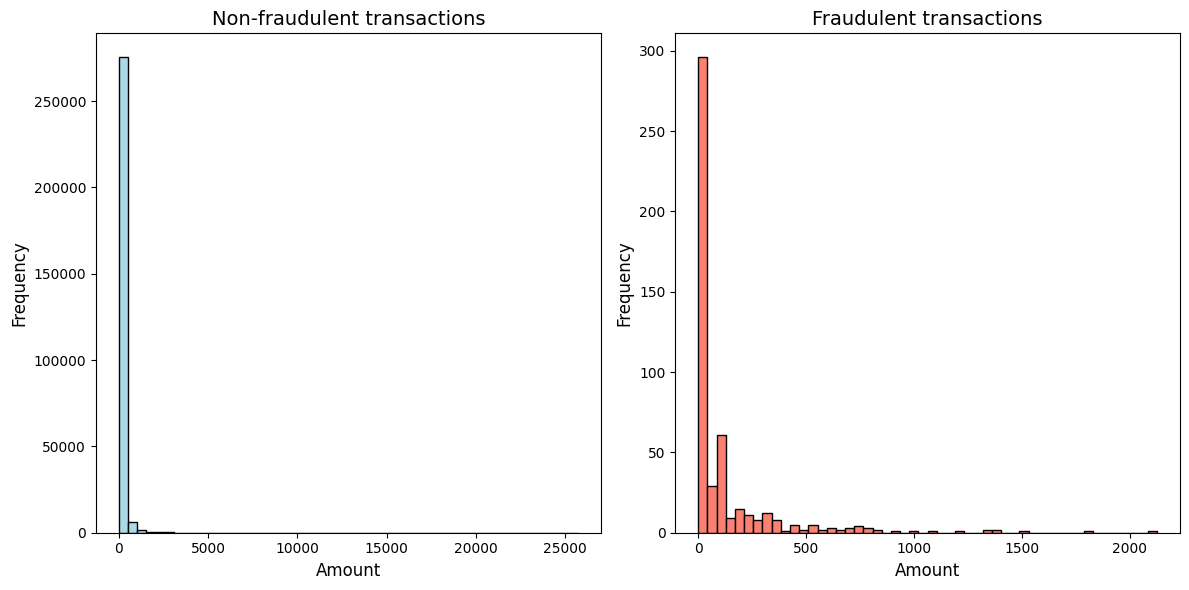

In [81]:
# Separating data into two categories (Class 0 and Class 1)
df_class_0 = df[df['Class'] == 0]['Amount']
df_class_1 = df[df['Class'] == 1]['Amount']

# Creating side-by-side graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Class 0
axes[0].hist(df_class_0, bins=50, color='lightblue', edgecolor='black')
axes[0].set_title('Non-fraudulent transactions', fontsize=14)
axes[0].set_xlabel('Amount', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Histogram for Class 1
axes[1].hist(df_class_1, bins=50, color='salmon', edgecolor='black')
axes[1].set_title('Fraudulent transactions', fontsize=14)
axes[1].set_xlabel('Amount', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Adjusting the layout
plt.tight_layout()

# Displaying the chart
plt.show()

The highest concentration of transactions (genuine and fraudulent) can be seen at low values, in accordance with their central values ​​verified in the previous subtopic.

---
To better verify the relationship between transaction values ​​(**Amount**), we will plot a boxplot graph for the values ​​of fraudulent transactions (**Class** = 1).


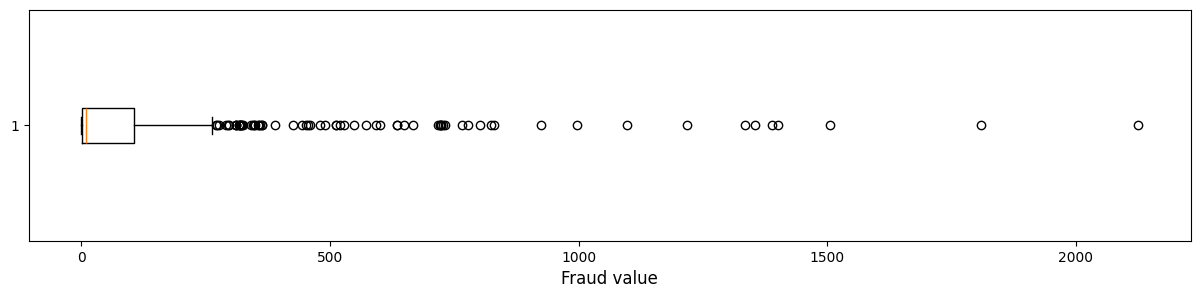

Among the 492 fraudulent transactions, 69 are outliers by the Interquartile Range method, used in the boxplot graph, as we can see above.
 These outliers range from 270.0 to 2125.87.


In [83]:
# Filter data for fraud (Class == 1)
df_fraud = df[df['Class'] == 1]

# Creating the boxplot
plt.figure(figsize=(15, 3))
plt.boxplot(df_fraud['Amount'], vert=False)

# Customizing the chart
plt.xlabel('Fraud value', fontsize=12)
plt.show()

# Calculating outliers using the IQR method
# Calculating quartiles
Q1 = df_fraud['Amount'].quantile(0.25)
Q3 = df_fraud['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper limit
upper_limit = Q3 + 1.5 * IQR

outliers_above = df_fraud[df_fraud['Amount'] > upper_limit]

print(f"Among the {df_fraud.shape[0]} fraudulent transactions, {outliers_above.shape[0]} are outliers by the Interquartile Range method, used in the boxplot graph, as we can see above.\n These outliers range from {outliers_above['Amount'].min()} to {outliers_above['Amount'].max()}.")

Finally, we will use a **correlation matrix** to check the correlation between 'Class' and all other variables.

Values ​​closer to -1 or 1 indicate a strong correlation. Values ​​closer to zero indicate weak/no correlation.

We can see that **no variable** correlates strongly with 'Class':

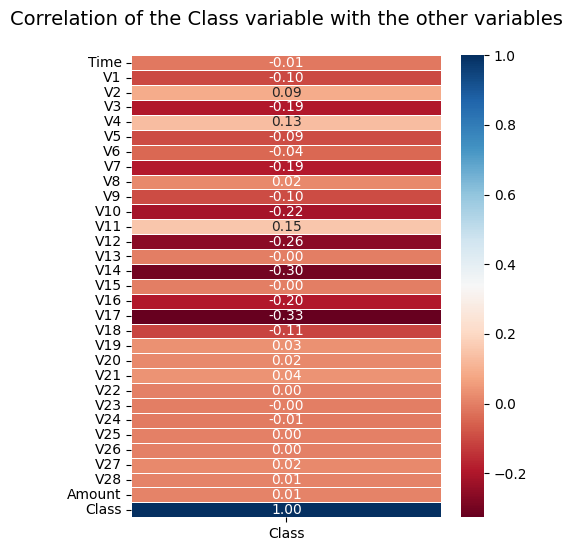

In [84]:
# Calculating the correlation of 'Class' with all other variables
correlation = df.corr()

# Filtering only the correlation of the 'Class' variable
correlation_class = correlation[['Class']]

# Ploting the correlation matrix
plt.figure(figsize=(5, 6))
sns.heatmap(correlation_class, annot=True, cmap='RdBu', cbar=True, fmt='.2f', linewidths=0.5)

# Customizing the charter
plt.title('Correlation of the Class variable with the other variables\n', fontsize=14)
plt.show()

#**Data Preparation**

In this section, the data will be prepared so that it can later be used in **supervised** machine learning models. This preparation includes **normalizing** the data in the "Time" and "Count" columns, **dividing the dataset** between training, validation, and testing, and finally, including/excluding data to **balance the dataset**, using the **UnderSampling** and **OverSampling** techniques.

##Data Normalization

To normalize the Time and Amount columns, the **MinMaxScaler** method will be used, which transforms the data to a **range between 0 and 1.**

Normalization is essential in machine learning because many algorithms are sensitive to the scale of the data, which can cause dominance of variables with larger values ​​and affect the convergence and effectiveness of the model.

In [85]:
# Importing the package needed for normalization
from sklearn.preprocessing import MinMaxScaler

# Using a copy of the dataset
df_normalized = df.copy()

# Initializing MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the 'Amount' column
df_normalized ['Amount'] = scaler.fit_transform(df[['Amount']])
df_normalized ['Time'] = scaler.fit_transform(df[['Time']])

df_normalized.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389,0
284806,1.000000,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.008446,0


##Division of the Dataset

Splitting the data into training, validation, and testing sets ensures that the model learns patterns from the training data, while the validation set is used for fine-tuning, preventing overfitting. The test set evaluates the final performance of the model on new data, simulating its real-world application. This separation is crucial to ensure generalizability and avoid biased results.

In [104]:
# Importing the package needed for split
from sklearn.model_selection import train_test_split

# Dividing the dataset into features and targets
X = df_normalized.drop('Class', axis=1)  # features
y = df_normalized['Class']  # target

# Splitting into training set (70%) and validation/test set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting the temporary set (validation/test) into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Checking the sizes of the divisions
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (199364, 30)
Validation set size: (42721, 30)
Testing set size: (42722, 30)


##Data balancing

To deal with imbalanced data problems, the **Undersampling** and **Oversampling** techniques will be used. Both help improve model performance by avoiding bias in favor of the dominant class.

**Undersampling** reduces the majority class by removing examples to balance the proportions, while **Oversampling** increases the representation of the minority class by creating new examples or replicating existing data.


###Under Sampling

In [105]:
# Importing the required package
from imblearn.under_sampling import RandomUnderSampler
# Applying the under-sampling technique
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)
# Checking class balance
print(pd.Series(y_rus).value_counts())

Class
0    356
1    356
Name: count, dtype: int64


###Over Sampling

In [106]:
# Importing the required package
from imblearn.over_sampling import SMOTE
# Applying SMOTE to balance the minority class in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_ros, y_ros = smote.fit_resample(X_train, y_train)

# Checking class balance
print(pd.Series(y_ros).value_counts())

Class
0    199008
1    199008
Name: count, dtype: int64


#**Modeling**

Two models will be built, **Logistic Regression** and **Decision Tree**, each of which will use data from the balancing performed by **Undersampling** and **Oversampling**, totaling four models.

After each model has been validated individually, the results obtained will be analyzed, focusing on the F1-Score and AUC-ROC curve metrics. After this, the models will be aggregated in order to obtain a model with the best metrics.

##Models Construction

###Logistic Regression with Under Sampling

Logistic regression is a supervised learning model used to predict the probability of a binary event (such as success/failure) based on independent variables. It uses the sigmoid function to convert the results into values ​​between 0 and 1, representing probabilities.

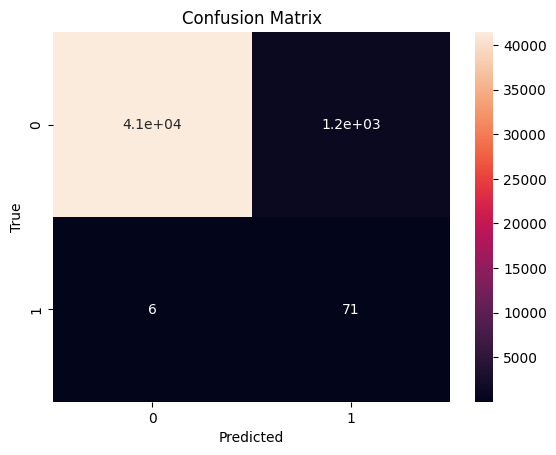

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9724    0.9859     42644
           1     0.0568    0.9221    0.1071        77

    accuracy                         0.9723     42721
   macro avg     0.5284    0.9472    0.5465     42721
weighted avg     0.9982    0.9723    0.9843     42721

AUC: 0.9859



In [107]:
# Importing the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


# Building the logistic regression model with data balanced by Undersampling
model_logreg_us = LogisticRegression()
model_logreg_us.fit(X_rus, y_rus)
# Making predictions with validation data
y_pred = model_logreg_us.predict(X_val)
y_proba = model_logreg_us.predict_proba(X_val)

# Confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")
plt.show()

# Showing the classification report
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))
# Showing the area under the curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_proba[:,1])))

# Creating the Metrics Dictionary
metrics_dict = {}
metrics_dict["logreg_us"] = [precision_score(y_val, y_pred, pos_label=1), recall_score(y_val, y_pred), f1_score(y_val, y_pred), roc_auc_score(y_val, y_proba[:,1])]


###Logistic Regression with Over Sampling

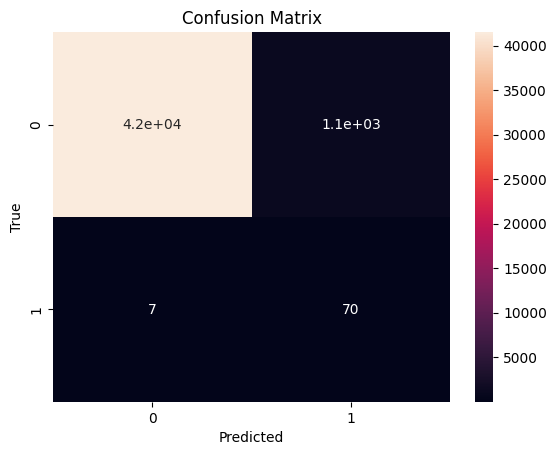

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9736    0.9865     42644
           1     0.0585    0.9091    0.1100        77

    accuracy                         0.9735     42721
   macro avg     0.5292    0.9413    0.5483     42721
weighted avg     0.9981    0.9735    0.9850     42721

AUC: 0.9795



In [108]:
# Building the logistic regression model with data balanced by Oversampling
model_logreg_os = LogisticRegression()
model_logreg_os.fit(X_ros, y_ros)
# Making predictions with validation data
y_pred = model_logreg_os.predict(X_val)
y_proba = model_logreg_os.predict_proba(X_val)

# Confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")
plt.show()

# Showing the classification report
print("Classification Report:\n", classification_report(y_val,y_pred, digits=4))
# Showing the area under the curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_proba[:,1])))

metrics_dict["logreg_os"] = [precision_score(y_val, y_pred, pos_label=1), recall_score(y_val, y_pred), f1_score(y_val, y_pred), roc_auc_score(y_val, y_proba[:,1])]

###Decision Tree with Under Sampling

A **decision tree** is a supervised learning model used for **classification** and regression that divides data into subsets based on decision rules. Each node represents a question about a variable, and the branches correspond to the possible answers.

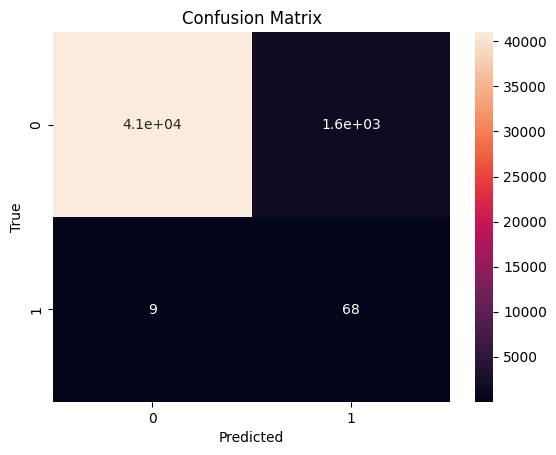

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9621    0.9806     42644
           1     0.0404    0.8831    0.0772        77

    accuracy                         0.9619     42721
   macro avg     0.5201    0.9226    0.5289     42721
weighted avg     0.9981    0.9619    0.9789     42721

AUC: 0.9489



In [109]:
# Importing the required package
from sklearn.tree import DecisionTreeClassifier

# Instantiating some hyperparameters, after trial and error with validation data
model_dectree_us = DecisionTreeClassifier(max_depth=5, criterion="entropy")

# Fitting the model with data balanced by Undersampling
model_dectree_us.fit(X_rus, y_rus)

# Making predictions with validation data
y_pred = model_dectree_us.predict(X_val)
y_proba = model_dectree_us.predict_proba(X_val)

# Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")
plt.show()

# Showing the classification report
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))
# Showing the area under the curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_proba[:,1])))

metrics_dict["dectree_us"] = [precision_score(y_val, y_pred, pos_label=1), recall_score(y_val, y_pred), f1_score(y_val, y_pred), roc_auc_score(y_val, y_proba[:,1])]

###Decision Tree with Over Sampling

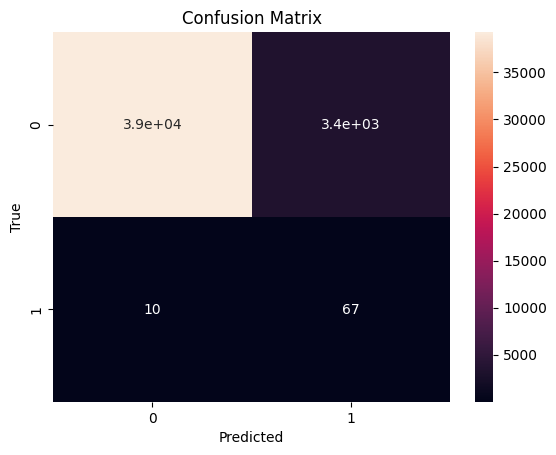

Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9212    0.9589     42644
           1     0.0196    0.8701    0.0382        77

    accuracy                         0.9211     42721
   macro avg     0.5096    0.8957    0.4986     42721
weighted avg     0.9980    0.9211    0.9572     42721

AUC: 0.9083



In [110]:
# Instantiating some hyperparameters, after trial and error with validation data
model_dectree_os = DecisionTreeClassifier(max_depth=5, criterion="entropy")

# Fitting the model with data balanced by Oversampling
model_dectree_os.fit(X_ros, y_ros)

# Making predictions with validation data
y_pred = model_dectree_os.predict(X_val)
y_proba = model_dectree_os.predict_proba(X_val)

# Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")
plt.show()

# Showing the classification report
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))
# Showing the area under the curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_proba[:,1])))
metrics_dict["dectree_os"] = [precision_score(y_val, y_pred, pos_label=1), recall_score(y_val, y_pred), f1_score(y_val, y_pred), roc_auc_score(y_val, y_proba[:,1])]


##Model Performance Evaluation

The metrics that will be used to evaluate the model are **F1-Score** and **ROC-AUC**.

---

***F1-Score*** because it encompasses two important metrics: **Precision** and **Recall**.

**Precision** is the rate of positives correctly detected among all those detected as positive, the higher the better. And in our context, **the higher it means that there were fewer wrong detections** (genuine purchases detected as fraud).

**Recall** is the rate of positives correctly detected among all that are actually positive, the higher the better. And in our context, **the higher it means that there were fewer frauds that were not detected**

---
***ROC-AUC*** evaluates the ability of a classification model to distinguish between classes, regardless of a specific threshold. It measures the **area under the ROC curve**, which compares the rate of true positives (sensitivity) against false positives. The higher the better. It is crucial in imbalanced problems, as it provides an **overview of the model's performance**.



In [111]:
# Consolidating the metrics from the four models into a dataframe and displaying:
metrics_df = pd.DataFrame(metrics_dict, index=['Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
metrics_df

,logreg_us,logreg_os,dectree_us,dectree_os
Precision,0.056845,0.058528,0.040356,0.019551
Recall,0.922078,0.909091,0.883117,0.870130
F1-Score,0.107089,0.109976,0.077185,0.038242
ROC-AUC,0.985862,0.979513,0.948871,0.908332


The **logreg_us** model has the highest ROC-AUC metric, and the **logreg_os** model has the highest F1-Score. The **dectree_us** and **dectree_os** models all have lower metrics than the logistic regression models.

Therefore, an aggregator model will be built, which will combine the two logistic regression models.

## Final Aggregator Model

This model combines the two logistic regression models used above, each with data balanced by a different technique.

The prediction results of each model will be compared, **if they are equal, it will be that result itself**. **If they are different, the result of the model with the highest probability will be defined as the result**, as in the examples below:

* For a given input, the **logreg_us** model defined that this input belongs to **Class=0** and the **logreg_os** model defined that this input also belongs to **Class=0**. Therefore, the aggregating model will define that input as **Class=0**.

* For another input, the **logreg_us** model defined that this input belongs to **Class=0** with a **53%** probability and the **logreg_os** model defined that this input belongs to **Class=1** with a **55%** probability. Therefore, **Class=1** will be defined for this input.



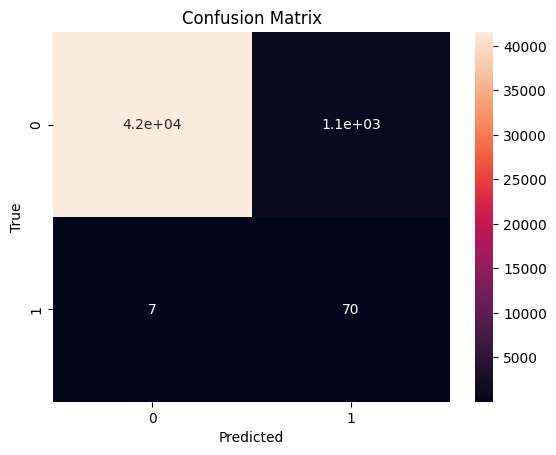

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9744    0.9870     42644
           1     0.0603    0.9091    0.1132        77

    accuracy                         0.9743     42721
   macro avg     0.5301    0.9418    0.5501     42721
weighted avg     0.9981    0.9743    0.9854     42721

AUC: 0.9833



In [112]:
# Initializing the prediction and probability lists
y_pred_logreg_us = model_logreg_us.predict(X_val)
y_proba_logreg_us = model_logreg_us.predict_proba(X_val)
y_pred_logreg_os = model_logreg_os.predict(X_val)
y_proba_logreg_os = model_logreg_os.predict_proba(X_val)

y_pred = []
y_proba = np.mean([y_proba_logreg_us, y_proba_logreg_os], axis=0)


# Iterating over the predictions to form the y_pred of the final model
for i in range(len(y_pred_logreg_us)):

    # If both models have the same prediction
    if y_pred_logreg_us[i] == y_pred_logreg_os[i] :
        y_pred.append(y_pred_logreg_us[i])
    # Otherwise, calculate according to the cumulative probability
    else:
         # Choose the class with the highest cumulative probability
        y_pred.append(np.argmax(y_proba[i]))

# Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")

plt.show()
# Showing the classification report
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))
# Showing the area under the curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_proba[:,1])))

metrics_dict["Aggregator Model"] = [precision_score(y_val, y_pred, pos_label=1), recall_score(y_val, y_pred), f1_score(y_val, y_pred), roc_auc_score(y_val, y_proba[:,1])]




In [113]:
# Consolidating the metrics from the two logistic regression models and the final aggregating model:
keys_to_remove =["dectree_os", "dectree_us"]
metrics_dict = {key: value for key, value in metrics_dict.items() if key not in keys_to_remove}
metrics_df = pd.DataFrame(metrics_dict, index=['Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
metrics_df

,logreg_us,logreg_os,Aggregator Model
Precision,0.056845,0.058528,0.060345
Recall,0.922078,0.909091,0.909091
F1-Score,0.107089,0.109976,0.113177
ROC-AUC,0.985862,0.979513,0.983309


The **F1-Score** and **ROC-AUC** metrics of the final aggregator model had their values ​​close to the highest values ​​between the two models.



#**Final Results**

## Final Test with the Test Set

Testing the final model with the test dataset

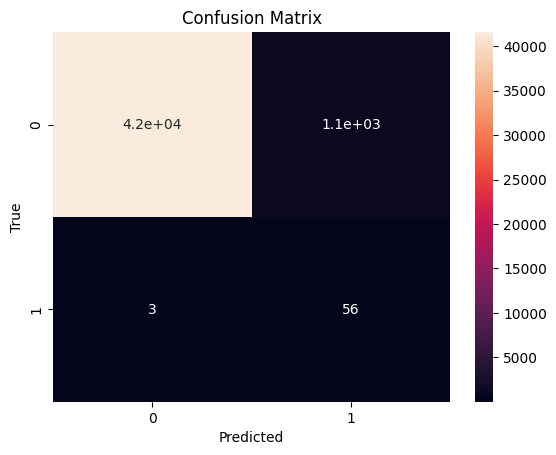

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9749    0.9873     42663
           1     0.0497    0.9492    0.0944        59

    accuracy                         0.9749     42722
   macro avg     0.5248    0.9620    0.5408     42722
weighted avg     0.9986    0.9749    0.9860     42722

AUC: 0.9814



In [116]:
# Initializing the prediction and probability lists
y_pred_logreg_us = model_logreg_us.predict(X_test)
y_proba_logreg_us = model_logreg_us.predict_proba(X_test)
y_pred_logreg_os = model_logreg_os.predict(X_test)
y_proba_logreg_os = model_logreg_os.predict_proba(X_test)

y_pred = []
y_proba = np.mean([y_proba_logreg_us, y_proba_logreg_os], axis=0)

# Iterating over the predictions to form the y_pred of the final model
for i in range(len(y_pred_logreg_us)):

    # If both models have the same prediction
    if y_pred_logreg_us[i] == y_pred_logreg_os[i] :
        y_pred.append(y_pred_logreg_us[i])
    # Otherwise, calculate according to the cumulative probability
    else:
         # Choose the class with the highest cumulative probability
        y_pred.append(np.argmax(y_proba[i]))

# Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Confusion Matrix")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")

plt.show()
# Showing the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
# Showing the area under the curve
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_proba[:,1])))

metrics_dict["Final Model"] = [precision_score(y_test, y_pred, pos_label=1), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_proba[:,1])]


In [115]:
# Consolidating the final result with previous validations
metrics_df = pd.DataFrame(metrics_dict, index=['Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
metrics_df


,logreg_us,logreg_os,Aggregator Model,Final Model
Precision,0.056845,0.058528,0.060345,0.049689
Recall,0.922078,0.909091,0.909091,0.949153
F1-Score,0.107089,0.109976,0.113177,0.094435
ROC-AUC,0.985862,0.979513,0.983309,0.981358


With the test data, the **F1-Score** was affected because the final model lost some of its **Precision**, detecting proportionally more false positives, however, its **Recall** rate increased, which is preferable in this type of problem. The ROC-AUC decreased due to the increase in false positives, however it still remained at a high level.

---
**ROC- Area Under the Curve**: Demonstrating the ability of the classification model to distinguish between classes.

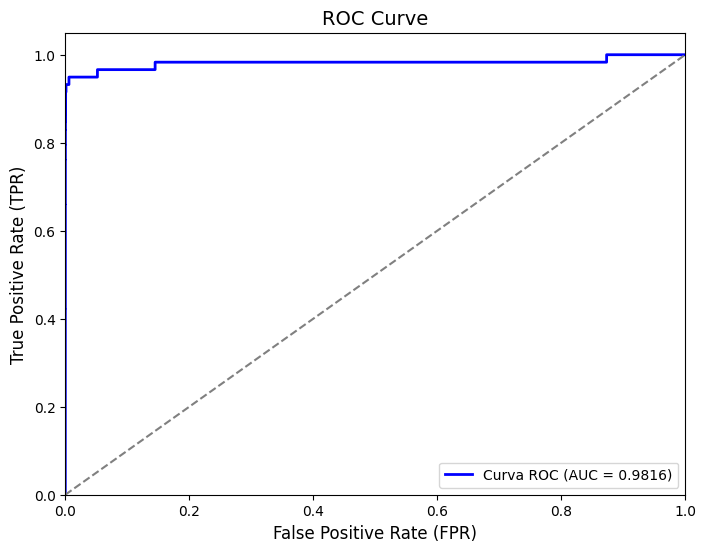

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculating FPR, TPR and Decision Threshold Rates
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

# Calculating AUC value
roc_auc = auc(fpr, tpr)

# Showing the area under the curve ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line (random chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.show()

## Conclusions

Finally, the standardization of the **project in phases** was an essential tool for correctly understanding the problem. The exploratory data analysis section was essential for obtaining the origin and **meanings of the data** and what can and cannot be done with it.

The validation of different models in a heuristic way allowed **highlighting the negative and positive points** of each one, thus obtaining a superior model that managed to bring together the positive points.

The final objective of this project was achieved by achieving **High Recall Rates** in the final test; of 59 fraudulent transactions, only 3 were not detected.
